<br/><div id="top"></div>
<center><a style="font-size: 40pt; font-weight:bold"> Signal Processing TP4</a></center>
<br/>

---

# Group members
* Jauroyon, Maxime
* Bhatt, Ragi

---

# Exercise - denoising by spectral substraction

## Data

    various noise: noise1 noise2 noise3
    “Clean” music signal Music
    Audio signal you want

## To do

    Simulate a noisy version of the music using the noises at various SNR Level
    Implement the spectral substraction method for denoising (search on my website about spectral substraction)
    Denoise the different given noisy version of the clean signal
    Discuss the parameters


---

<a style="font-size: 30pt; font-weight:bold"> 1. Create noisy version of the music using the noises </a>

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import wavfile
from IPython.display import Audio
from IPython.display import display as ipd
from scipy.signal import stft, istft
from scipy.fft import fft, fftfreq

## Add noise to the music

In [2]:
#  Simulate a noisy version of the music using the noises at various SNR Level

# Load the music
fs, data = wavfile.read('music.wav')

# Load the noises (same fs as music)
fs, noise1 = wavfile.read('noise1.wav')
fs, noise2 = wavfile.read('noise2.wav')
fs, noise3 = wavfile.read('noise3.wav')

def add_noise(signal, noise, SNR):
    # Power spectrum of signal
    S = np.mean(np.abs(fft(signal)[:len(signal)//2]**2))
    # Power spectrum of noise
    N = np.mean(np.abs(fft(noise)[:len(signal)//2]**2))
    # Compute the scaling factor (taking the power spectrum of the noise into account)
    alpha = np.sqrt(S/(N*10**(SNR/10)))
    # noisy music
    y = signal + alpha*noise

    # Compute the SNR
    SNR = 10 * np.log10(S/np.mean(np.abs(fft(signal - y)[:len(signal)//2]**2)))

    return y, (alpha*noise), SNR

# give the Audio of the noisy music with the 3 noises at 0,10,20 db
SNRs = [0,10,20]
for i in SNRs:
    print("----------- " + str(i) + " db ---------------")
    y_1, noise, SNR = add_noise(data, noise1, i)
    print('SNR with noise 1 : ' + str(round(SNR, 2)) + ' dB')
    ipd(Audio(y_1, rate=fs))
    y_2, noise, SNR = add_noise(data, noise2, i)
    print('SNR with noise 2 : ' + str(round(SNR, 2)) + ' dB')
    ipd(Audio(y_2, rate=fs))
    y_3, noise, SNR = add_noise(data, noise3, i)
    print('SNR with noise 3 : ' + str(round(SNR, 2)) + ' dB')
    ipd(Audio(y_3, rate=fs))


----------- 0 db ---------------
SNR with noise 1 : 0.0 dB


SNR with noise 2 : -0.0 dB


SNR with noise 3 : -0.0 dB


----------- 10 db ---------------
SNR with noise 1 : 10.0 dB


SNR with noise 2 : 10.0 dB


SNR with noise 3 : 10.0 dB


----------- 20 db ---------------
SNR with noise 1 : 20.0 dB


SNR with noise 2 : 20.0 dB


SNR with noise 3 : 20.0 dB


### we can clearly ear the variation of the noise level with the SNR, the lower the SNR the more we can ear the noise

---

<a style="font-size: 30pt; font-weight:bold"> 2. Spectral substraction method for denoising </a>

## Spectral substraction method

----------- 0 db ---------------


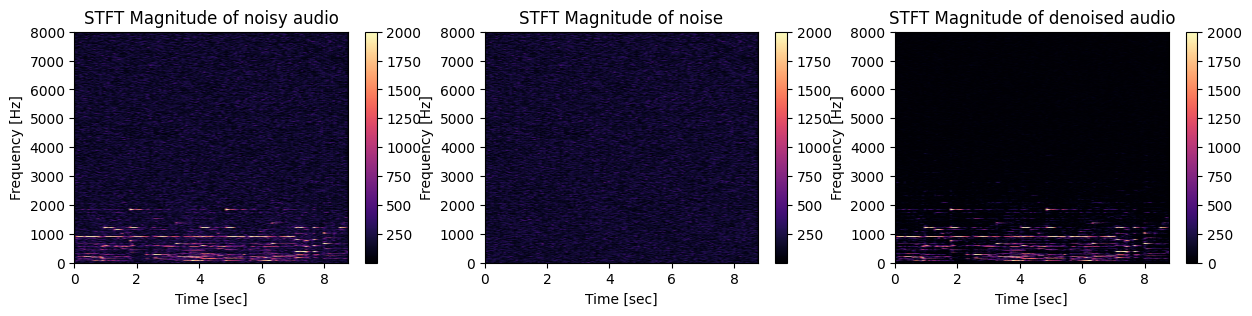

noisy audio


denoised audio


SNR of denoised audio : 10.0 dB
----------- 10 db ---------------


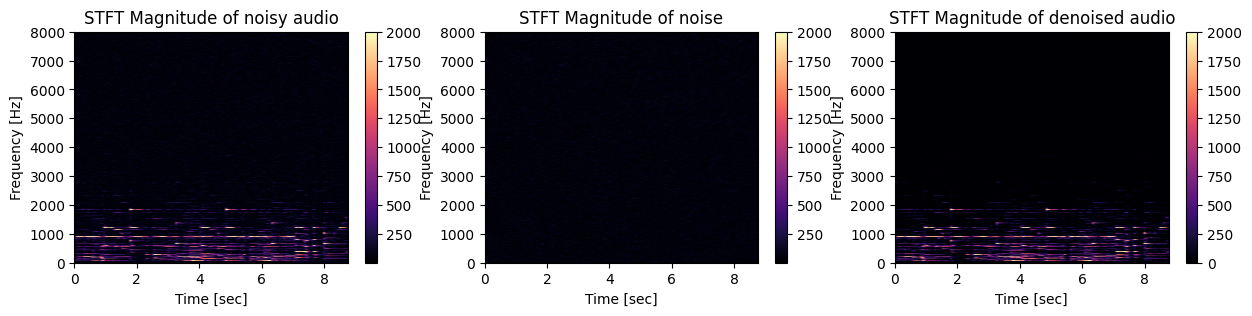

noisy audio


denoised audio


SNR of denoised audio : 17.6 dB
----------- 20 db ---------------


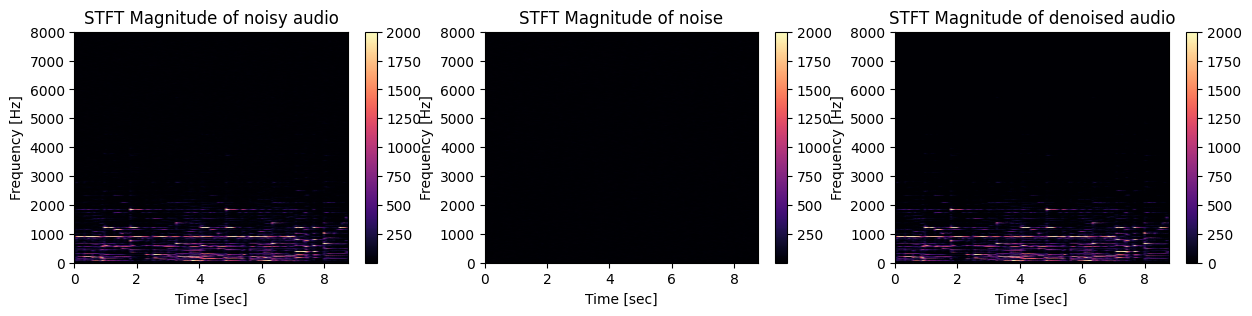

noisy audio


denoised audio


SNR of denoised audio : 25.55 dB


In [3]:
# create noisy audio with noise 1 at 0,10,20 db
ys = []
y_noises = []
y_SNRs = []
for i in SNRs:
    y, noise, SNR = add_noise(data, noise1, i)
    ys.append(y)
    y_noises.append(noise)
    y_SNRs.append(SNR)

# Implement the spectral substraction method for denoising
def spectral_substraction(y, n, fs, L, noverlap, coef, window_shape="hann"):
    # Compute the STFT of the signal
    f, t, Y = sp.signal.stft(y, fs=fs, window=window_shape, nperseg=L, noverlap=noverlap, nfft=L)
    # Compute the STFT of the noise
    f, t, S = sp.signal.stft(n, fs=fs, window=window_shape, nperseg=L, noverlap=noverlap, nfft=L)

    # Compute the denoised STFT
    X = Y * np.maximum(0, 1 - coef**2 * np.abs(S)**2 / np.abs(Y)**2)
    
    # Compute the denoised signal
    _, x = sp.signal.istft(X, fs=fs, window=window_shape, nperseg=L, noverlap=noverlap, nfft=L)
    
    return x[:data.shape[0]], X, Y, S, f, t # x[:data.shape[0]] to have the same size as the original signal because otherwise it has 287 more samples

# Plot the spectrogram of the noisy audio, denoised audio, noise with noise 1 at 0,10,20 db on the same plot
denoised = []
for i in range(len(ys)):
    print("----------- " + str(SNRs[i]) + " db ---------------")
    x, X, Y, S, f, t = spectral_substraction(ys[i], y_noises[i], fs, 2048, 1024, 0.9)
    denoised.append(x)
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, 1)
    plt.pcolormesh(t, f, np.abs(Y), vmax=2000, shading='gouraud', cmap="magma")
    plt.title('STFT Magnitude of noisy audio')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.pcolormesh(t, f, np.abs(S), vmax=2000, shading='gouraud', cmap="magma")
    plt.title('STFT Magnitude of noise')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.pcolormesh(t, f, np.abs(X), vmax=2000, shading='gouraud', cmap="magma")
    plt.title('STFT Magnitude of denoised audio')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    plt.show()
    # Give the Audio of the noisy audio
    print("noisy audio")
    ipd(Audio(ys[i], rate=fs))
    # Give the Audio of the denoised audio
    print("denoised audio")
    ipd(Audio(x, rate=fs))

    # compute SNR of the denoised audio
    SNR = 10 * np.log10(np.mean(np.abs(fft(data)[:len(data)//2]**2))/np.mean(np.abs(fft(data-x)[:len(data)//2]**2)))

    print('SNR of denoised audio : ' + str(round(SNR, 2)) + ' dB')


### we can clearly ear the difference between the noisy music and the denoised music, the denoised musci of the 0 SNR is similar to the noisy music of the 10 SNR so we gain 10 SNR but the more SNR at the beginning the less we gain, we only gain 5.55 SNR for the 20 SNR noisy music but it is enough to not ear the small noise in the background. Later we will see if the decrease of the SNR gain is due to the parameters or the method itself.

---

<a style="font-size: 30pt; font-weight:bold"> 3. Experiment the parameters </a>

## The parameters are the following:

    the shape of the window
    the window size
    the overlap
    the coefficient (will use it for x axis)
    the redondancy in frequency (not gonna use it)

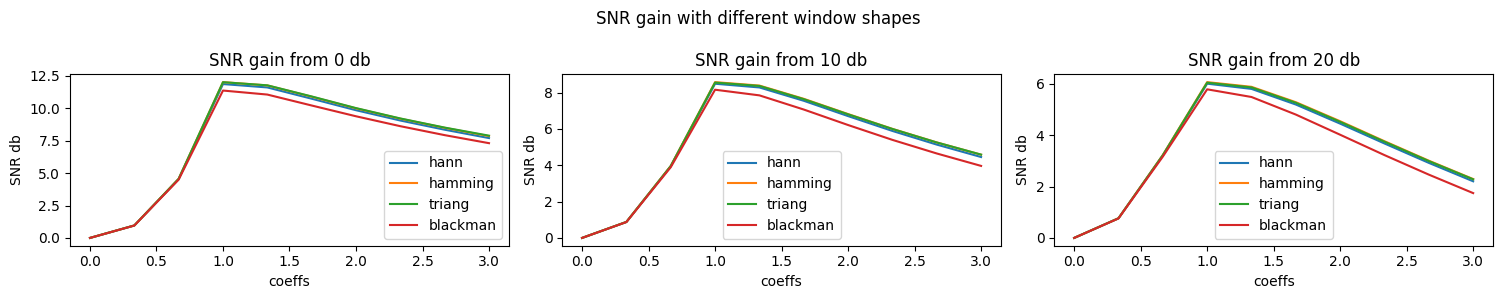

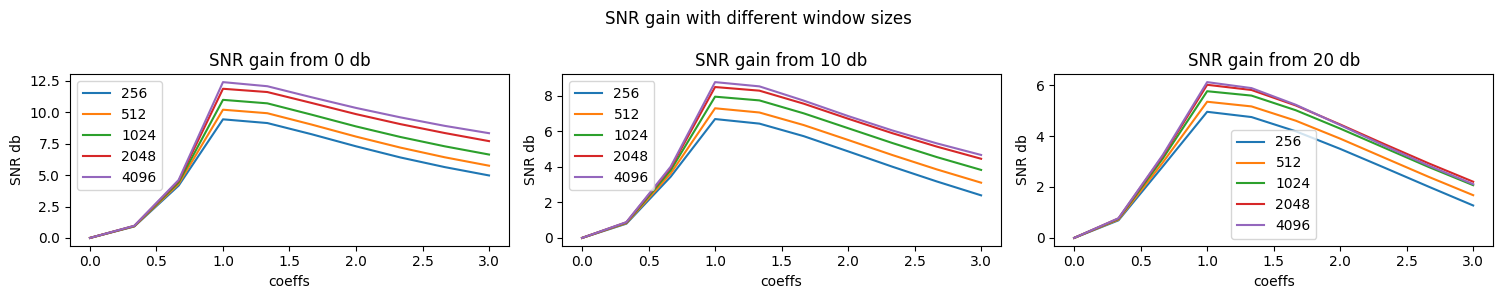

/tmp/ipykernel_2779/2420499581.py:19: RuntimeWarning: invalid value encountered in divide
  X = Y * np.maximum(0, 1 - coef**2 * np.abs(S)**2 / np.abs(Y)**2)


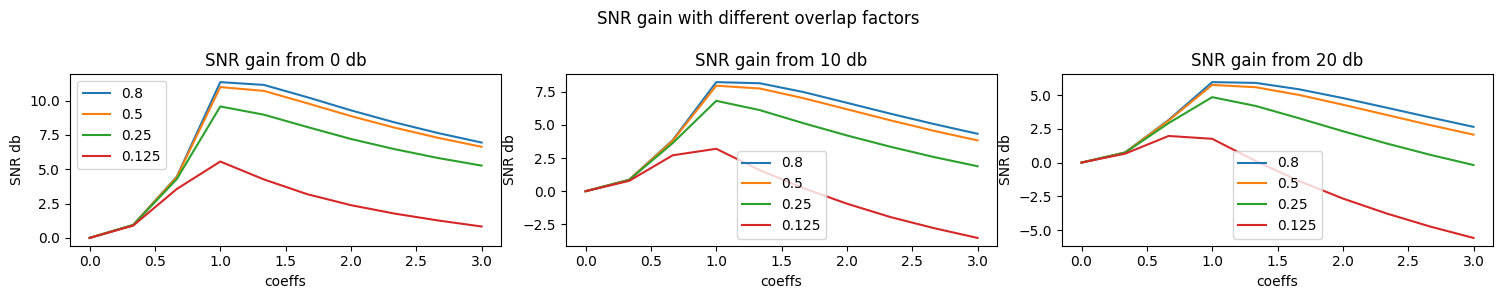

In [4]:
window_shapes = ["hann", "hamming", "triang", "blackman"]
window_sizes = [256, 512, 1024, 2048, 4096]
overlap_factors = [1.25, 2, 4, 8]
coeffs = np.linspace(0.0, 3, 10)

# for each type of param (except coeffs) we will plot the gain in SNR with coeffs on the x axis and the SNR db on the y axis
# we will do this for each type of param to compare the different values of the param
# and we do it with the 3 noisy audio at 0,10,20 db

# starting with window_shapes
plt.figure(figsize=(15, 3))
plt.suptitle("SNR gain with different window shapes")
for i in range(len(ys)):
    plt.subplot(1, 3, i+1)
    for j in window_shapes:
        SNRs_gain = []
        for k in coeffs:
            x, X, Y, S, f, t = spectral_substraction(ys[i], y_noises[i], fs, 2048, 1024, k, j)
            SNRs_gain.append((10 * np.log10(np.mean(np.abs(fft(data)[:len(data)//2]**2))/np.mean(np.abs(fft(data-x)[:len(data)//2]**2))))-y_SNRs[i])
        plt.plot(coeffs, SNRs_gain, label=j)
    plt.xlabel('coeffs')
    plt.ylabel('SNR db')
    plt.title("SNR gain from " + str(SNRs[i]) + " db")
    plt.legend()
plt.tight_layout()
plt.show()

# now with window_sizes
plt.figure(figsize=(15, 3))
plt.suptitle("SNR gain with different window sizes")
for i in range(len(ys)):
    plt.subplot(1, 3, i+1)
    for j in window_sizes:
        SNRs_gain = []
        for k in coeffs:
            x, X, Y, S, f, t = spectral_substraction(ys[i], y_noises[i], fs, j, j//2, k)
            SNRs_gain.append((10 * np.log10(np.mean(np.abs(fft(data)[:len(data)//2]**2))/np.mean(np.abs(fft(data-x)[:len(data)//2]**2))))-y_SNRs[i])
        plt.plot(coeffs, SNRs_gain, label=j)
    plt.xlabel('coeffs')
    plt.ylabel('SNR db')
    plt.title("SNR gain from " + str(SNRs[i]) + " db")
    plt.legend()
plt.tight_layout()
plt.show()

# now with overlap_factors
plt.figure(figsize=(15, 3))
plt.suptitle("SNR gain with different overlap factors")
for i in range(len(ys)):
    plt.subplot(1, 3, i+1)
    for j in overlap_factors:
        SNRs_gain = []
        for k in coeffs:
            x, X, Y, S, f, t = spectral_substraction(ys[i], y_noises[i], fs, 1024, 1024//j, k)
            SNRs_gain.append((10 * np.log10(np.mean(np.abs(fft(data)[:len(data)//2]**2))/np.mean(np.abs(fft(data-x)[:len(data)//2]**2))))-y_SNRs[i])
        plt.plot(coeffs, SNRs_gain, label=1/j)
    plt.xlabel('coeffs')
    plt.ylabel('SNR db')
    plt.title("SNR gain from " + str(SNRs[i]) + " db")
    plt.legend()
plt.tight_layout()
plt.show()


### window shapes
    apart from "blackman" they are all similar

### window size
    the bigger the window the better the denoising (but the more we loose in time resolution, see next cell)

### overlap
    the more overlap the better the denoising but 50% and 80% are pretty close so better use 50% to save time

### We also see more clearly that the more SNR we start with the less we gain whatever the parameters

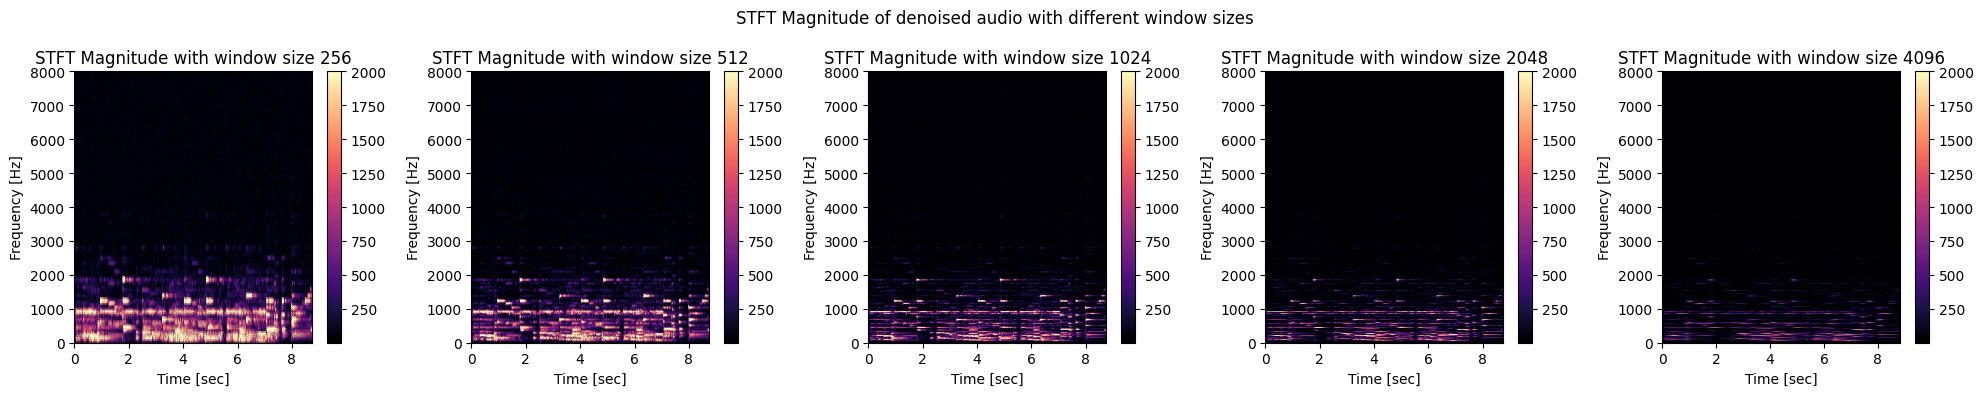

In [5]:
# compare the spectogram of the denoised audio with window size 256, 512, 1024, 2048, 4096
plt.figure(figsize=(20, 4))
plt.suptitle("STFT Magnitude of denoised audio with different window sizes")
for i in window_sizes:
    plt.subplot(1, 5, window_sizes.index(i)+1)
    # Compute the STFT of the music
    f, t, Y = sp.signal.stft(y, fs=fs, window="hann", nperseg=i, noverlap=i//2, nfft=i)
    # plot the spectogram
    plt.pcolormesh(t, f, np.abs(Y), vmax=2000, shading='gouraud', cmap="magma")
    plt.title('STFT Magnitude with window size ' + str(i))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
plt.tight_layout()
plt.show()

### Additional observation : we can observe that low length windows are more localized in time domain but less in frequency domain and vice versa for high length windows